In [1]:
import pandas as pd
import numpy as np 

import collections
import matplotlib.pyplot as plt

In [2]:
En = pd.read_excel("En_In.xls") 

In [3]:
#Завдання 1-4
import re
def remove_text_between_parens(text):
    n = 1  
    while n:
        text, n = re.subn(r'\([^()]*\)', '', text)  
    return text 

df = En.drop(En.columns[[0]], axis=1).dropna().drop_duplicates()
df = df.drop(En.columns[[1]], axis=1).set_axis(['Country', 'Energy Supply', 'Energy Supply per Capita', '%Renewable'], axis=1, inplace=False)
df.loc[:,'Energy Supply'] *= 1000000
df[['Energy Supply', 'Energy Supply per Capita', '%Renewable']]=df[['Energy Supply', 'Energy Supply per Capita', '%Renewable']].apply(pd.to_numeric, errors='coerce')
for file in df['Country']:
    df.loc[df['Country']==file, 'Country']=re.sub(r'[\d]+', r'',remove_text_between_parens(file)).strip()
df=df.set_index('Country').rename(index={'Republic of Korea':'South Korea','United States of America':'United States','United Kingdom of Great Britain and Northern Ireland':'United Kingdom','China, Hong Kong Special Administrative Region':'Hong Kong'}).reset_index()
df.loc[df['Country'].isin(['American Samoa','South Korea','Bolivia'])]

,Country,Energy Supply,Energy Supply per Capita,%Renewable
3,American Samoa,NaN,NaN,0.641026
24,Bolivia,3.360000e+08,32.0,31.477120
164,South Korea,1.100700e+10,221.0,2.279353


In [4]:
#Завдання 5
gpd = pd.read_csv("gpd.csv")
DF=gpd[4:]
DF.columns = gpd.iloc[3].values
DF=DF.reset_index(drop=True)
DF=DF.set_index('Country Name').rename(index={'Korea, Rep.':'South Korea','Iran, Islamic Rep.':'Iran','Hong Kong SAR, China':'Hong Kong'}).reset_index()
DF.head(1)


,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN


In [5]:
#Завдання 6
scimagojr = pd.read_excel("scimagojr.xlsx")
scimagojr

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57
...,...,...,...,...,...,...,...,...
186,187,Guyana,1,1,0,0,0.00,0
187,188,Christmas Island,1,1,0,0,0.00,0
188,189,Reunion,1,1,2,1,2.00,1
189,190,Saint Lucia,1,1,0,0,0.00,0


In [6]:
#Завдання 7
df1=DF.drop(DF.columns[4:50], axis=1).rename(columns={'Country Name': 'Country'}).set_index('Country')
df2=scimagojr[scimagojr['Rank']<=15].set_index('Country')
df3=df.set_index('Country')
a1=pd.concat([df2, df3, df1], axis='columns')
a=a1[a1['Rank'].notnull()].drop(a1.columns[10:13], axis=1)
print(a.shape)
a.head(15)

(15, 20)


,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,%Renewable,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0
China,1.0,127050.0,126767.0,597237.0,411683.0,4.70,138.0,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2.0,96661.0,94747.0,792274.0,265436.0,8.20,230.0,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3.0,30504.0,30287.0,223024.0,61554.0,7.31,134.0,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4.0,20944.0,20357.0,206091.0,37874.0,9.84,139.0,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5.0,18534.0,18301.0,34266.0,12422.0,1.85,57.0,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6.0,17899.0,17620.0,215003.0,40930.0,12.01,149.0,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7.0,17027.0,16831.0,140566.0,27426.0,8.26,126.0,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8.0,15005.0,14841.0,128763.0,37209.0,8.58,115.0,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9.0,13153.0,12973.0,130632.0,28601.0,9.93,114.0,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12
South Korea,10.0,11983.0,11923.0,114675.0,22595.0,9.57,104.0,1.100700e+10,221.0,2.279353,9.410199e+11,9.924316e+11,1.020510e+12,1.027730e+12,1.094499e+12,1.134796e+12,1.160809e+12,1.194429e+12,1.234340e+12,1.266580e+12


In [7]:
#Завдання 8
def task_eight():
    print(a[a.columns[10:20]].mean(axis=1).sort_values(ascending=[False]))
task_eight();


United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64


In [8]:
#Завдання 9
def task_nine():
    n1=a[a.columns[10:20]].mean(axis=1).sort_values(ascending=[False]).index[4]
    n2=a[a.columns[19]][n1]-a[a.columns[10]][n1]
    return(n1,n2)
task_nine()

('France', 153345695364.24023)

In [9]:
#Завдання 10
def task_ten():
    n1=a['%Renewable'][a['%Renewable']==a['%Renewable'].max()].index[0]
    n2=a['%Renewable'][a['%Renewable']==a['%Renewable'].max()][n1]
    return(n1,n2)
task_ten()

('Brazil', 69.64803)

In [10]:
#Завдання 11
def task_eleven():
    n1=(a['Energy Supply']/a['Energy Supply per Capita']).sort_values(ascending=[False]).index[5]
    n2=(a['Energy Supply']/a['Energy Supply per Capita']).sort_values(ascending=[False])[n1]
    return(n1,n2)
task_eleven()

('Japan', 127409395.97315437)

In [11]:
#Завдання 12
s1 = a['Energy Supply per Capita']
s2 = a['Citable documents']/(a['Energy Supply']/a['Energy Supply per Capita'])
s1.corr(s2)

0.7940010435442947

In [14]:
#Завдання 13
Median=[]
for i in range(15):
    if(a['%Renewable'][i]>=a['%Renewable'].median()):
        Median.append(1)
    else:
        Median.append(0)
pd.Series(Median, index=a.index)

China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
dtype: int64

In [15]:
#Завдання 14
ContinentDict = {'China':'Asia','United States':'North America','Japan':'Asia','United Kingdom':'Europe','Russian Federation':'Europe','Canada':'North America','Germany':'Europe','India':'Asia','France':'Europe','South Korea':'Asia','Italy':'Europe','Spain':'Europe','Iran':'Asia','Australia':'Australia','Brazil':'South America'}
c = collections.Counter(ContinentDict.values())
h=pd.DataFrame(list(ContinentDict.items())).rename(columns={0: 'Country', 1: 'Continen'})
people_sum=pd.concat([h.set_index('Country'), pd.DataFrame(a['Energy Supply']/a['Energy Supply per Capita']).rename(columns={0: 'People'})], axis='columns')
ff=pd.DataFrame(list(c.items())).rename(columns={0: 'Continen', 1: 'size'}).set_index('Continen')
Sum=[]
Mean=[]
Std=[]
for i in range(5):
    Sum.append(people_sum[people_sum['Continen']==ff.index[i]].set_index('Continen').sum()[0])
    Mean.append(people_sum[people_sum['Continen']==ff.index[i]].set_index('Continen').mean()[0])
    Std.append(people_sum[people_sum['Continen']==ff.index[i]].set_index('Continen').std()[0])
ff['sum'] = pd.Series(Sum, index=ff.index)
ff['mean'] = pd.Series(Mean, index=ff.index)
ff['std'] = pd.Series(Std, index=ff.index)
ff

,size,sum,mean,std
Continen,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
Australia,1,2.331602e+07,2.331602e+07,NaN
South America,1,2.059153e+08,2.059153e+08,NaN


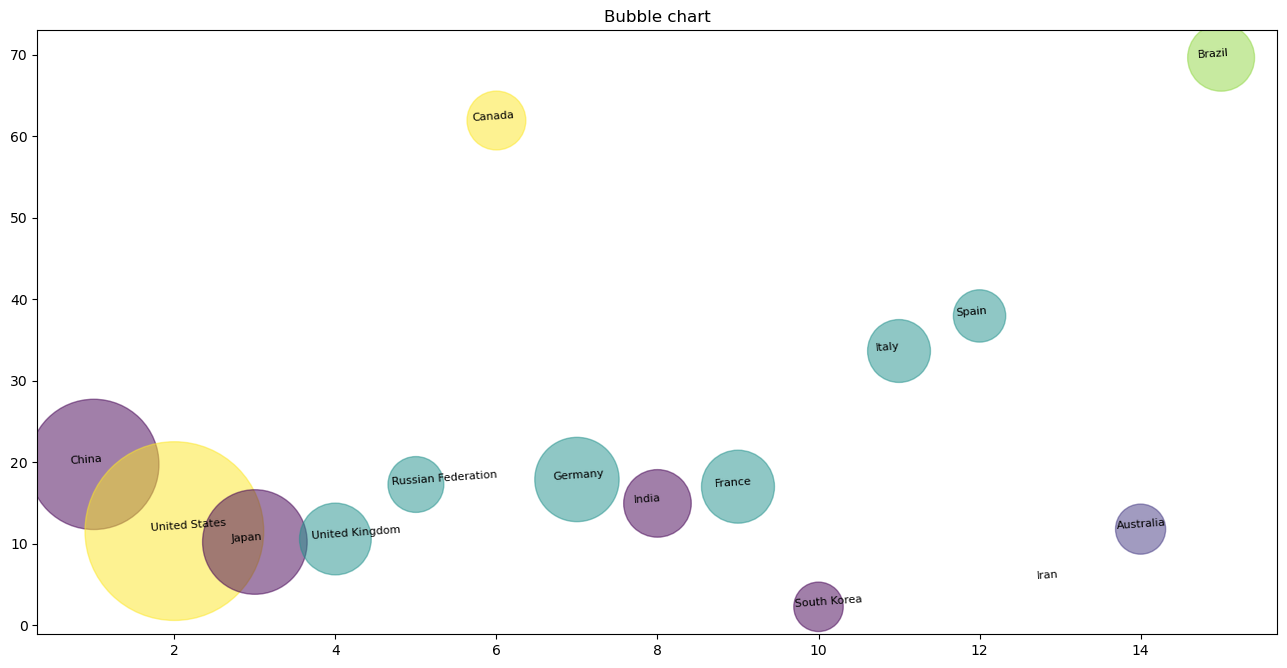

In [16]:
#Завдання 15
colors = list(ContinentDict.values())
for index in range(len(colors)):
    colors[index]=len(colors[index])+c[colors[index]]
sizes = a[2015.0].values/1000000000
x = a['Rank'].values
y = a['%Renewable'].values
plt.figure(figsize=(16, 8),dpi=100)
plt.scatter(x, y, c=colors, s=sizes, alpha=0.5, cmap='viridis')
for i in range(15):
    plt.text(x[i]-0.3, y[i],a.index[i],rotation=4, size=8)
plt.title("Bubble chart");